# Visualization

### 1D Function Plot
A 1D function consists of a dependent variable and an independent variable. The function can be plotted on a 2D plane where each point corresponds to the ordered pair (x,f(x)).

For example: $y=f(x)=x^2, [-2,2]$ <br>
Some of the points satisfying this function are {(-2,4),(-1,1),(0,0),(1,1),(2,4)}<br>
It can be plotted as follows.

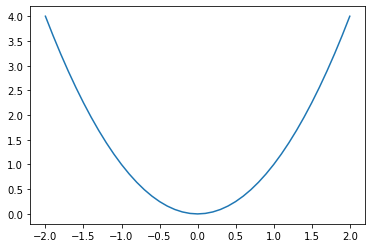

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(41)/10-2
y=x**2
plt.plot(x,y)
plt.show()

### Exercise 1

Plot the function $y=f(x)=1-x+x^2-x^3$ in the interval $[-5,5]$

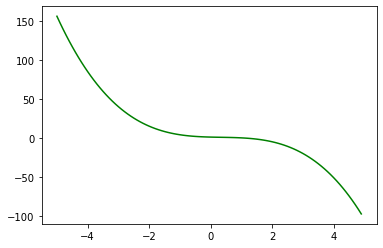

In [9]:
#Solution
x=np.arange(-5,5,0.1)
y=1-x+x**2-x**3
plt.plot(x,y,color='g')
plt.show()

### 2D function plot on a plane
To plot a 2D function you will primarily need to import the matplotlib library.
"meshgrid" is a function that allows creating the coordinates for a mesh. Explore shape and values of X, and Y, and compare it with Z1, as a first exercise.
Many functions are implemented into the submodule "mlab" that reproduces many functions that already exist in Matlab and with which many students are familiar. 


In [8]:
x=np.arange(-1.0,1.0,0.1) #a one dimensional array
y=np.arange(-2.0,2.0,0.1) #a one dimensional array
X,Y=np.meshgrid(x,y)      # creates a 2D array
print(X[5,5],Y[5,5]) #accessing the elements of the meshgrid in the form of ordered paris (x,y)

-0.5000000000000001 -1.4999999999999996


<img style=" align:center; display:inline" src="figures/gridd1.jpg" width="200" height="400" alt="grid" /><br/>
<img style=" align:center; display:inline" src="figures/gridd2.jpg" width="200" height="400" alt="grid" /><br/>
<img style=" align:center; display:inline" src="figures/gridd.jpg" width="200" height="400" alt="grid" /><br/>
Forming a rectrangular grid using 'meshgrid' command

Here we plot the function $z=\sin(xy)-\cos(x-y)$ in the interval $[-\pi,\pi]*[-\pi,\pi]$ and save it on a file.

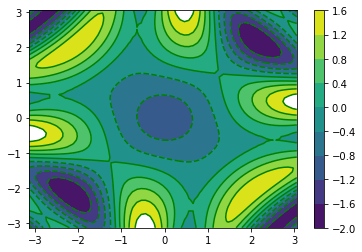

In [61]:
import numpy as np
import matplotlib.pyplot as plt

x = y = np.arange(-np.pi, np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z1 = np.sin(X*Y)
Z2 = np.cos(X-Y)
Z = (Z1 - Z2)
levels = np.arange(-2.0,2.0,0.4)
CS = plt.contourf(X, Y, Z, levels)
CS4 = plt.contour(X, Y, Z, levels, colors='g')
plt.colorbar(CS)
plt.savefig('test-save.png')
plt.show()

## Exercise 2

Plot the function $z=e^{x+y}-x^6y^6$ in the interval $[-5,5]*[-5,5]$. Suggestion: play with the levels.

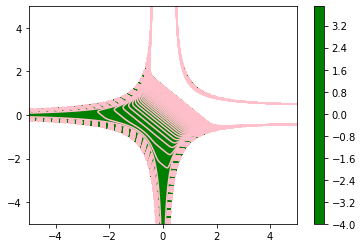

In [59]:
# here write the solution and give it a different name from Z (already used)
a=b=np.arange(-5,5,0.01)
A,B=np.meshgrid(a,b)
C1=np.exp(A+B)
C2=A**6 * B**6
C=C1-C2
levels=np.arange(-4,4,0.1)
PS=plt.contourf(A,B,C,levels,colors='green')
PS_line=plt.contour(A,B,C,levels,colors='pink')
plt.colorbar(PS) #filled color bar because using PS
plt.show()


### 2D Function Plot on a 3D Surface
The 2D function can also be visualized on a 3D surface. The X and Y axes denote the independent variables whereas the Z axis represent the value of the function for that value of X and Y. Let us visualize the above graph in 3D surface.

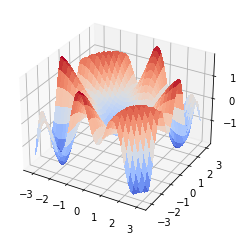

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

### Example: Plotting over a global map
It is possible to plot any function over a sphere.
In Geodynamics we often want to map our numerical models on the Earth surface,
or plot our data on a physical Map. Aimed at doing this MatplotLib has a specific
module called mpl_toolkits.basemap. This can be installed, e.g., in Anaconda with the
command conda install basemap. Let us first create a very simple projection of a map
on a sphere of a simple function (decays exponentially toward the poles, oscillated
like a wave with the longitude). First we load the module, create the coastlines, color
the continents versus the oceans and plot the latitude and longitude:

## Exercise 2

Plot the function $z=e^{x+y}-x^6y^6$ in the interval $[-5,5]*[-5,5]$. Suggestion: play with the levels.

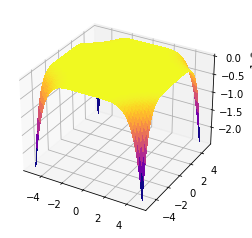

In [67]:
# Here you can write your implementation

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
surf=ax.plot_surface(A, B, C, cmap=cm.plasma,
                       linewidth=0, antialiased=False)
plt.show()

^C
ERROR: Operation cancelled by user
^C
ERROR: Operation cancelled by user


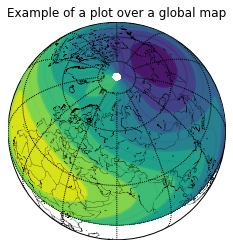

In [78]:

!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install -q pyproj==1.9.6



## IMPORTANT!! YOU MIGHT HAVE TO INSTALL Basemap
## to make it to work: 
## conda install -c anaconda basemap

from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap as bm
import matplotlib.pyplot as plt
import numpy as np

# Let us set our view above Eurasia. And use low resolution. 
myMap =Basemap(projection='ortho',lat_0=60,lon_0=60,resolution='l')

# draw coastlines, countries and continents.
myMap.drawcoastlines(linewidth=0.25)
myMap.drawcountries(linewidth=0.25)
#myMap.fillcontinents(color='orange',lake_color='aqua')

# draw the edge of the map, the meridians and the parallels
#myMap.drawmapboundary(fill_color='aqua')
myMap.drawmeridians(np.arange(0,360,30))
myMap.drawparallels(np.arange(-90,90,30))

# make up some data on a regular lat/lon grid.
n = 100; d = 2*np.pi/(n-1)
[lats,lons] = d*np.indices((n,n))
wave = np.exp(-lats/10) * np.cos(lons)
mean = np.cos(2.*lats) * np.sin(2.*lats)
x, y = myMap(lons*180./np.pi, lats*180./np.pi) #project the lat/lon on the grid
cs = myMap.contourf(x,y,mean+wave) #project a contour plot on,the map
cs = myMap.contour(x,y,mean+wave,15,linewidths=1.5) #project a contour plot on,the map
plt.title('Example of a plot over a global map')
plt.show()

## Exercise 3

Play with the 'wave' and 'mean' values in order to obtain a very different global plot. 


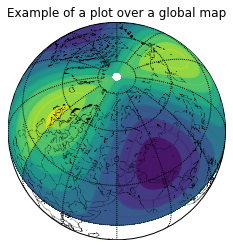

In [85]:
# Here you can write your implementation

from mpl_toolkits.basemap import Basemap

# Let us set our view above Eurasia. And use low resolution. 
myMap =Basemap(projection='ortho',lat_0=60,lon_0=60,resolution='l')

# draw coastlines, countries and continents.
myMap.drawcoastlines(linewidth=0.25)
myMap.drawcountries(linewidth=0.25)

myMap.drawparallels(np.arange(-90,90,30))
myMap.drawmeridians(np.arange(0,360,30))

n = 100; d = 2*np.pi/(n-1)
[lats,lons] = d*np.indices((n,n))
wave = np.exp(-lons/10) * np.cos(lats)
mean = np.cos(2.*lons) * np.sin(2.*lats)
x, y = myMap(lons*180./np.pi, lats*180./np.pi) #project the lat/lon on the grid
cs = myMap.contourf(x,y,mean-wave) #project a contour plot on,the map
cs = myMap.contour(x,y,mean-wave,15,linewidths=1.5) #project a contour plot on,the map
plt.title('Example of a plot over a global map')
plt.show()



### NetCDF and ETOPO

In the next example, I will use the standard storage system called NetCDF4. NetCDF
stands for Network Common Data Form and it is an interface for storing and retrieving
data in form of arrays, that are the main format of data that we use in our models
and for data representation. 

To store the data in arrays has numerous advantages that
we will exploit when learning how to use NumPy. Among them that array values
may be accessed directly, ignoring the details of how the data are stored. This means
that netCDF datasets can be only partially accessed and transformed, without locally
storing and managing the entire datasets, which therefore can be very large.

The physical representation of netCDF data is designed to be independent of
the computer on which the data were written. In particular in the version four of
NetCDF the modern data format HDF5 was introduced, allowing unlimited datatypes
and specifically designed for efficiently transmit high volume and complex data.
Examples on how to create, store and retrieve HDF5 data in Python are in 
https://portal.hdfgroup.org/display/HDF5/Learning+HDF5

[  0.00000000e+00   8.33341051e-02   1.66668210e-01 ...,   3.59753332e+02
   3.59836666e+02   3.59920000e+02]
[-90.         -89.91666667 -89.83333333 ...,  89.83333333  89.91666667
  90.        ]


ValueError: Unknown format

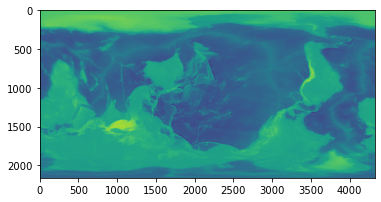

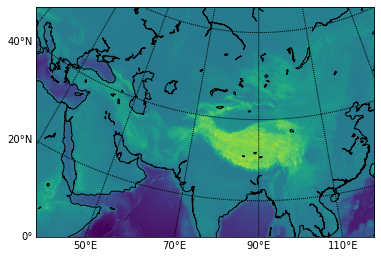

In [119]:
import mpl_toolkits.basemap as bm
import numpy as np
import matplotlib.pyplot as plt
#from netCDF4 import Dataset
import netCDF4 as nc
#loading the data and extracting the latitude, longitude and topography
#if this dataset is not available anymore, it can be downloaded from many, sources
#as well as the more recent higher resolution versions
#url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
#url = 'http://ferret.pmel.noaa.gov/pmel/thredds/catalog/data/PMEL/etopo5.nc'
#url='https://github.com/dcherian/tools/blob/master/ROMS/arango/bathymetry/etopo5.nc'
#url='https://github.com/dcherian/tools/raw/master/ROMS/arango/bathymetry/etopo5.nc'
#url='https://www.dropbox.com/s/bnuekeu7giq2msd/etopo5.nc?dl=0'
#url = 'http://oos.soest.hawaii.edu/thredds/dodsC/etopo5'
url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
topography = nc.Dataset(url) #extract data using NetCDF
topoin = topography.variables['ROSE'][:]
lons = topography.variables['ETOPO05_X'][:]
lats = topography.variables['ETOPO05_Y'][:]
plt.imshow(topoin)
topoin.shape
print(lons);print(lats)
# ETOPO and basemap are shifted of 180 degrees in longitude, so we need to,shift the reference
topoin,lons = bm.shiftgrid(180.,topoin,lons,start=False)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
m = Basemap(llcrnrlon=40.,llcrnrlat=0., urcrnrlon=140,urcrnrlat=60.,resolution='l',area_thresh=1000., projection='lcc',lat_1=30.,lon_0=90.,ax=ax) #viewpoint from space
n = 1000
nx = 1 + int( (m.xmax-m.xmin)/n )
ny = 1 + int( (m.ymax-m.ymin)/n )
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat)
m.drawcoastlines()
par = np.arange(0.,80.,20.); m.drawparallels(par,labels=[1,0,0,0])
mer = np.arange(10.,360.,20.); m.drawmeridians(mer,labels=[0,0,0,1])
cb = m.colorbar(im,"right", size="5")
ax.set_title('Topography above Himalaya')
plt.show()


## Exercise 4

Display the world topography, and put your country of origin at the center of the view.

ValueError: Unknown format

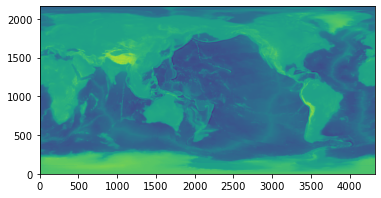

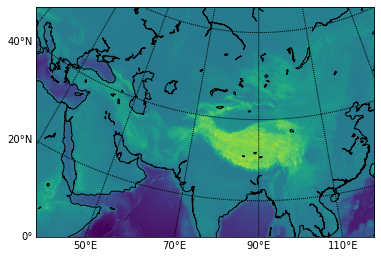

In [128]:
# Here you can write your implementation

#url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
#topography = nc.Dataset(url) #extract data using NetCDF
topoin = topography.variables['ROSE'][:]
lons = topography.variables['ETOPO05_X'][:]
lats = topography.variables['ETOPO05_Y'][:]
plt.imshow(topoin,origin='lower')
topoin.shape

# ETOPO and basemap are shifted of 180 degrees in longitude, so we need to,shift the reference
topoin,lons = bm.shiftgrid(180.,topoin,lons,start=False)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
m = Basemap(llcrnrlon=40.,llcrnrlat=0., urcrnrlon=140,urcrnrlat=60.,resolution='l',area_thresh=1000., projection='lcc',lat_1=30.,lon_0=90.,ax=ax) #viewpoint from space
n = 1000
nx = 1 + int( (m.xmax-m.xmin)/n )
ny = 1 + int( (m.ymax-m.ymin)/n )
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat)
m.drawcoastlines()
par = np.arange(0.,80.,20.); m.drawparallels(par,labels=[1,0,0,0])
mer = np.arange(10.,360.,20.); m.drawmeridians(mer,labels=[0,0,0,1])
cb = m.colorbar(im,"right", size="5")
ax.set_title('Topography above Himalaya')
plt.show()



### Example: Plotting a seismic event near Kilauea

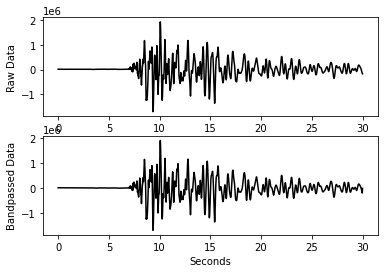

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy.signal import freqattributes

# Load the data from the web
Network = "HV"; Station = "WRM"; Location = "--"; Channel = "HHE"
t1 = UTCDateTime("2016-08-24T22:17:50.000")
client = Client("IRIS")
st = client.get_waveforms(Network, Station, Location, Channel, t1, t1 + 30)

# There is only one trace in the Stream object, let’s work on that trace...
tr = st[0]; df=tr.stats.sampling_rate; dD=tr.stats.delta

# Filtering a copy of the original Trace
fMin=0.1; fMax=20
tr_filt = tr.copy()
tr_filt.filter('bandpass', freqmin=fMin, freqmax=fMax, corners=3, zerophase=True)
tr_spec = freqattributes.spectrum(tr_filt.data,df,18001)

# Plottnig raw and filtered data
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211); plt.plot(t, tr.data, 'k'); plt.ylabel('Raw Data')
plt.subplot(212); plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Bandpassed Data'); plt.xlabel('Seconds')
plt.show()

## Exercise 5

Pick ten random intervals of one minute and plot how they look like. What do you expect?

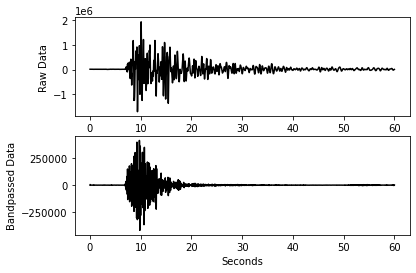

In [114]:
# Here you can write your implementation

Network = "HV"; Station = "WRM"; Location = "--"; Channel = "HHE"
t1 = UTCDateTime("2016-08-24T22:17:50.000")
client = Client("IRIS")
st = client.get_waveforms(Network, Station, Location, Channel, t1, t1 + 60)

# There is only one trace in the Stream object, let’s work on that trace...
tr = st[0]; df=tr.stats.sampling_rate; dD=tr.stats.delta

fMin=5; fMax=20
tr_filt = tr.copy()
tr_filt.filter('bandpass', freqmin=fMin, freqmax=fMax, corners=3, zerophase=True) 
tr_spec = freqattributes.spectrum(tr_filt.data,df,18001)

# Plottnig raw and filtered data
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211); plt.plot(t, tr.data, 'k'); plt.ylabel('Raw Data')
plt.subplot(212); plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Bandpassed Data'); plt.xlabel('Seconds')
plt.show()



### Example: 3D scatter plotting

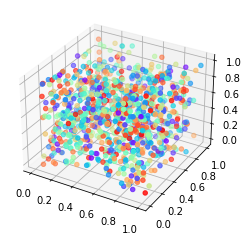

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

n = 1000
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color=cm.rainbow(np.linspace(0,1,n))
xs = np.random.rand(n)
ys = np.random.rand(n)
zs = np.random.rand(n)
ax.scatter(xs, ys, zs, c=color)
plt.show()

## Exercise 6

Can you plot the points so that the color represent the distance of the dots from the center of the dots cloud?

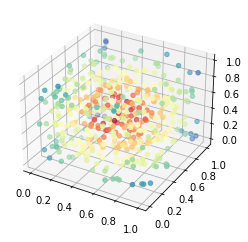

In [72]:
# Here you can write your implementation

n=500
dists=[]
color=[]
xs = np.random.rand(n)
ys = np.random.rand(n)
zs = np.random.rand(n)
x_mean=np.mean(xs)  # finding the centers
y_mean=np.mean(ys)
z_mean=np.mean(zs)

#for i,j,k in zip(xs,ys,zs):    # distance of each dots from the centers  
   # dist=np.sqrt((i-x_mean)**2+(j-y_mean)**2+(k-z_mean)**2)
    #dists.append(dist)

dists=np.sqrt((xs-x_mean)**2+(ys-y_mean)**2+(zs-z_mean)**2)
dist_max=max(dists)
dist_min=min(dists)

#for d in dists:
   # c=(d-dist_min)/(dist_max-dist_min) # scaling the distance to 0-1
    #color.append(c)

#shades=cm.Spectral(color)    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(xs, ys, zs, c=shades)
ax.scatter(xs, ys, zs, c=dists, cmap=plt.cm.Spectral) #various ways of plotting the same thing
#ax.scatter(xs, ys, zs, c=color, cmap=plt.cm.Purples)
plt.show()

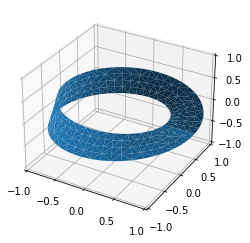

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import tri

n = 50; l = 5
u = np.arange(n)*2*np.pi/(n-1)
u = u * np.ones((l,1))
u = u.reshape(n*l)
v = np.arange(l)/(l-1)-0.5
v = v * np.ones((n,1))
v = v.transpose().reshape(n*l)

#Mobius mapping, (u, v) -> (x, y, z)
x= (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y= (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z= 0.5 * v * np.sin(u / 2.0)

# Create the triangulated surface
surface = tri.Triangulation(u, v)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z, triangles=surface.triangles)
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);
plt.show()

To run the cell in which the VTK file is created, one has to first create the x,y,z variables here on top.

In [102]:
n = 50; l = 5
u = np.arange(n)*2*np.pi/(n-1)
u = u * np.ones((l,1))
u = u.reshape(n*l)
v = np.arange(l)/(l-1)-0.5
v = v * np.ones((n,1))
v = v.transpose().reshape(n*l)

#Mobius mapping, (u, v) -> (x, y, z)
x= (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y= (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z= 0.5 * v * np.sin(u / 2.0)

In [103]:
def writeVTKSurface(outFileName,x,y,z,triangles):
    nodesNumber=x.size
    trianglesNumber=int(triangles.size/3)
    
    m=open(outFileName,'w')
    m.write('# vtk DataFile Version 2.0\n')
    m.write('Moebius surface\n')
    m.write('ASCII\n')
    m.write('DATASET POLYDATA\n')

    m.write('POINTS'+str(nodesNumber)+ 'float\n')    
    for node in np.arange(nodesNumber):
        m.write(str(x[node])+' '+str(y[node])+' '+str(z[node])+' \n')
    
    m.write('POLYGONS '+str(trianglesNumber)+' '+str(trianglesNumber*4)+'\n')
    for triangle in np.arange(trianglesNumber):
        m.write('3 '+str(triangles[triangle,0])+' '+str(triangles[triangle,1])+' '+str(triangles[triangle,2])+'\n')
    m.close()
    
    return()

#calling this function


writeVTKSurface('moebius.vtk',x,y,z,surface.triangles)   


()

In [ ]:
# download ParaView software to visualize VTK files